Healthcare Access and Disease Burden in Africa Analysis
A comprehensive analysis of the African healthcare dataset, covering data cleaning, exploratory analysis, visualization, and dashboard creation.

Step 1: Data Loading and Initial Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets

# Load the dataset
url = "https://raw.githubusercontent.com/ongei001/healthcare-disease-dashboard/main/african_healthcare_data.csv"
df = pd.read_csv(url)

# Display basic info
print(df.info())
print(df.head())

Step 2: Data Cleaning

In [6]:
# Standardize country names (remove any leading/trailing whitespace)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()


# Data cleaning
df['country'] = df['country'].str.strip()
num_cols = ['vaccination_rate', 'malaria_prevalence', 'hiv_prevalence', 
            'healthcare_facilities', 'access_to_water', 'access_to_sanitation']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')  # Ensure numeric
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df = df.drop_duplicates()

# Handle missing values
# For numerical columns, fill with median (less sensitive to outliers)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For categorical columns, fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for duplicates
df = df.drop_duplicates()

# Save cleaned dataset
df.to_csv('cleaned_african_healthcare_data.csv', index=False)

Step 3: Exploratory Data Analysis

In [10]:
# Summary statistics
print(df.describe())



       vaccination_rate  malaria_prevalence  hiv_prevalence  \
count         54.000000           54.000000       54.000000   
mean          57.929297           26.058803       17.204512   
std           20.977881           12.285467        8.971196   
min           20.024306            5.063224        1.353391   
25%           41.880785           17.375996        9.998474   
50%           64.369694           26.007571       16.946055   
75%           72.981763           33.797967       25.392566   
max           93.681152           49.082396       29.721633   

       healthcare_facilities  access_to_water  access_to_sanitation  
count              54.000000        54.000000             54.000000  
mean              513.833333        66.415278             53.902081  
std               292.412267        17.783274             19.571024  
min                66.000000        31.555577             20.223906  
25%               220.000000        52.693033             36.545079  
50%         

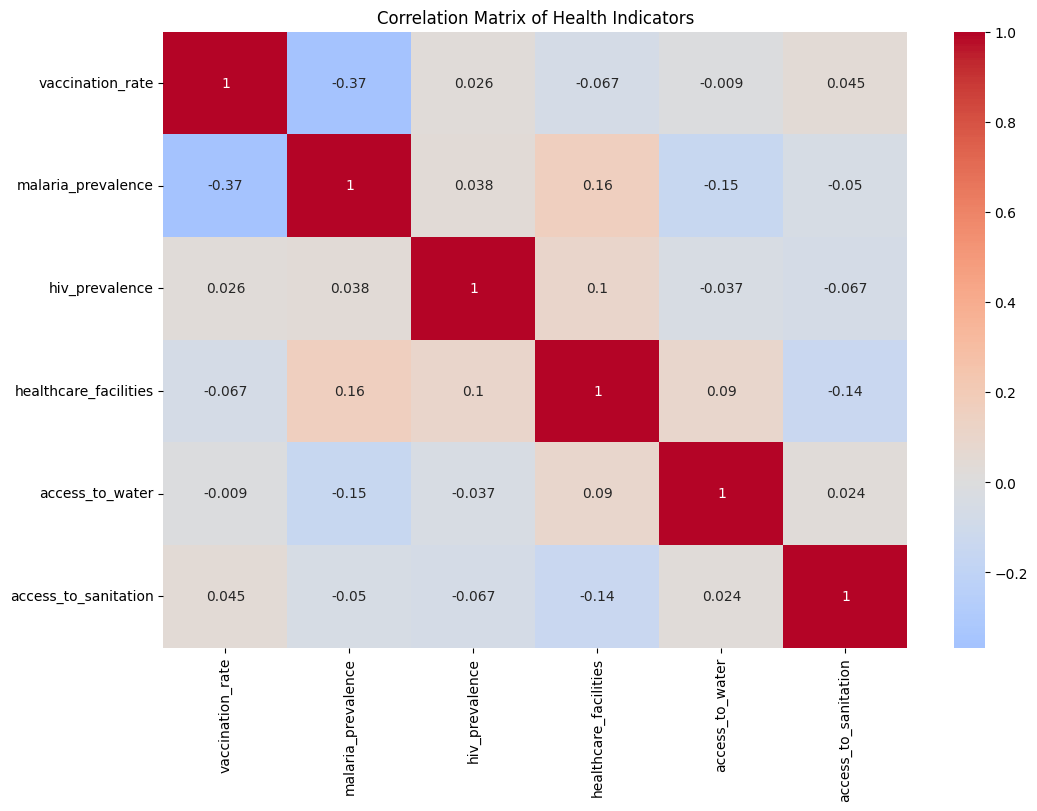

In [11]:
# Correlation analysis
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Health Indicators')
plt.show()



C:\Users\okell\AppData\Local\Temp\ipykernel_13672\1168337836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='malaria_prevalence', data=top_malaria, palette='viridis')


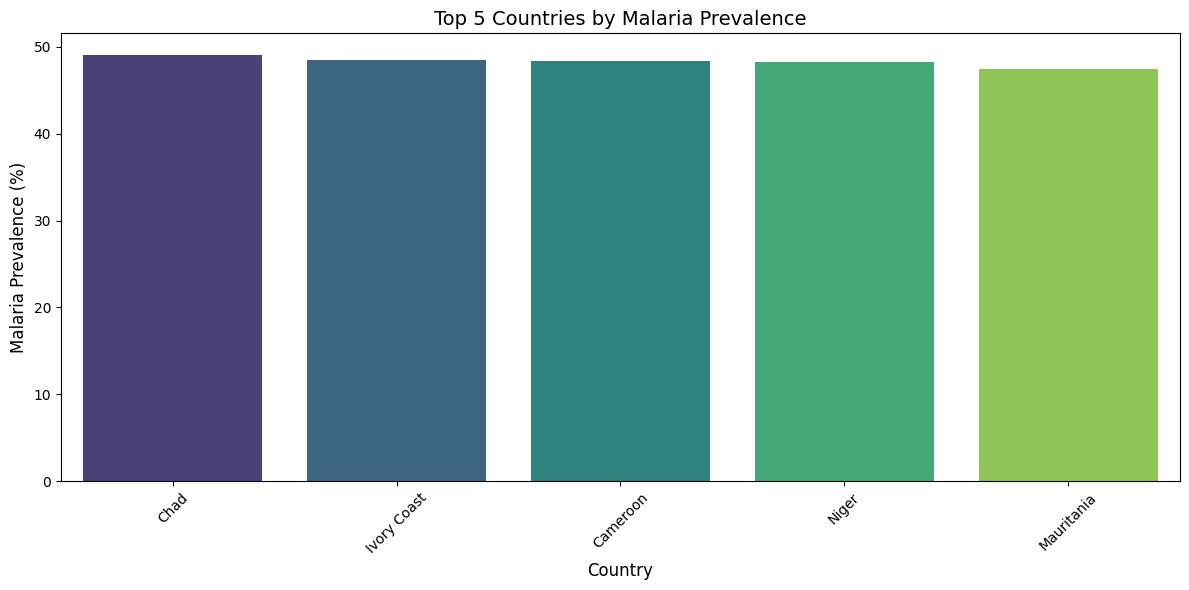

In [12]:
# Visualization 1: Top 5 Malaria Prevalence
plt.figure(figsize=(12, 6))
top_malaria = df.nlargest(5, 'malaria_prevalence')
sns.barplot(x='country', y='malaria_prevalence', data=top_malaria, palette='viridis')
plt.title('Top 5 Countries by Malaria Prevalence', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Malaria Prevalence (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

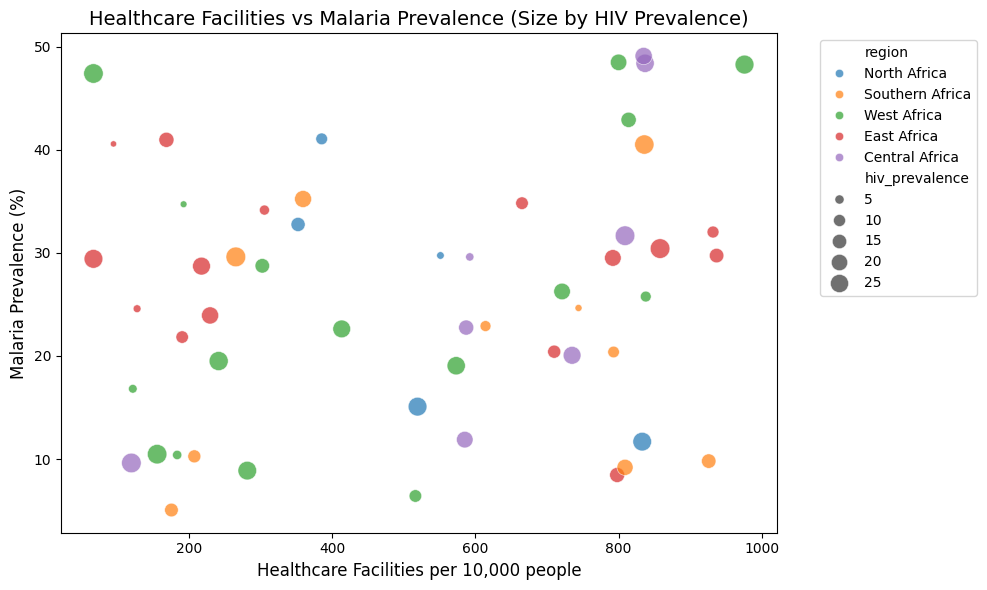

In [9]:
# Visualization 2: Healthcare Facilities vs Disease Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='healthcare_facilities', y='malaria_prevalence', 
                size='hiv_prevalence', hue='region', 
                data=df, sizes=(20, 200), alpha=0.7)
plt.title('Healthcare Facilities vs Malaria Prevalence (Size by HIV Prevalence)', fontsize=14)
plt.xlabel('Healthcare Facilities per 10,000 people', fontsize=12)
plt.ylabel('Malaria Prevalence (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interactive Dashboard

In [ ]:
# Interactive Dashboard
def create_interactive_plot(x_axis='healthcare_facilities', 
                          y_axis='malaria_prevalence',
                          color_by='region', 
                          size_by='hiv_prevalence'):
    fig = px.scatter(df, 
                     x=x_axis,
                     y=y_axis,
                     color=color_by,
                     size=size_by,
                     hover_name='country',
                     title=f'{x_axis.replace("_", " ").title()} vs {y_axis.replace("_", " ").title()}',
                     labels={x_axis: x_axis.replace("_", " ").title(),
                             y_axis: y_axis.replace("_", " ").title(),
                             color_by: color_by.replace("_", " ").title(),
                             size_by: size_by.replace("_", " ").title()})
    fig.update_layout(width=1000, height=600)
    fig.show()

# Create dropdown options
numeric_cols = ['vaccination_rate', 'malaria_prevalence', 'hiv_prevalence', 
               'healthcare_facilities', 'access_to_water', 'access_to_sanitation']
categorical_cols = ['region']

interact(create_interactive_plot,
         x_axis=widgets.Dropdown(options=numeric_cols, value='healthcare_facilities'),
         y_axis=widgets.Dropdown(options=numeric_cols, value='malaria_prevalence'),
         color_by=widgets.Dropdown(options=categorical_cols, value='region'),
         size_by=widgets.Dropdown(options=numeric_cols, value='hiv_prevalence'))

# Save interactive dashboard
fig = px.scatter(df, x='healthcare_facilities', y='malaria_prevalence',
                 color='region', size='hiv_prevalence', hover_name='country')
fig.write_html('african_healthcare_dashboard.html')

interactive(children=(Dropdown(description='x_axis', index=3, options=('vaccination_rate', 'malaria_prevalence…